# Practice 0

## Course "Métodos Estadísticos y Numéricos en Cosmología"
##### Rafael Morales Moreno, Maestría en Ciencias (Física), UNAM

## 1. Exercise: check the error evolution

In one code, generate **100 times:**

    -Normal random trails of 10 elements with variance = 1
    -Normal random trails of 100 elements with variance = 1
    -Normal random trails of 1000 elements with variance = 1

Evaluate the **mean** of each realisation and then the **standard deviation** of the means for each 100 realisations group (1 stdev for 10 elements, one for 100 elements and one for 1000 elements); **report the results of the 3 standard deviations** in one plot and compare with expected value $1/\sqrt{N}$ (because each trial is with variance = 1), with $N$ the number of realisations.

In [1]:
import numpy as np  #importing necessary modules (for arrays and statistics)
#import statistics

In [2]:
# making 100 numpy normal random trials with variance =1

random10 = np.random.normal(0.0,1.0,size=(100,10)) # the last argument stands for 100 realisations and n elements
random100 = np.random.normal(0.0,1.0,size=(100,100))
random1000 = np.random.normal(0.0,1.0,size=(100,1000))

# taking the mean value of the 100 realisations of 10, 100 and 1000 elements
mean10 = np.mean(random10,axis=1)
mean100 = np.mean(random100,axis=1)
mean1000 = np.mean(random1000,axis=1)

# Printing the mean of each realisation
print("The mean values for the samples of 10, 100 and 1000 elements are, respectively :", "\n", mean10,"\n", mean100, "\n", mean1000)

The mean values for the samples of 10, 100 and 1000 elements are, respectively : 
 [-0.35862531  0.36354725  0.39589468 -0.06376097  0.20963706 -0.04851822
  0.15889202 -0.07052622 -0.43377345  0.27235309 -0.04266888  0.10978951
  0.2059671   0.02302454  0.33645406  0.09117314  0.24470011  0.50743824
  0.01034747 -0.23839664 -0.12429308  0.30649048  0.06343996 -0.08034933
 -0.08089355  0.20173232 -0.1642888   0.04051901  0.24233393  0.53754487
 -0.25223381 -0.19134773 -0.16182243  0.30750029  0.31494181 -0.85474551
  0.38839875 -0.31948559 -0.23877656  0.39183626 -0.20252909 -0.13214491
  0.92256865  0.06186917  0.60852823  0.24893937  0.36403123 -0.21206
  0.06971626  0.13111765 -0.27738266  0.31345155 -0.18219188 -0.28840617
 -0.30220263  0.42627428 -0.51891639 -0.35778235 -0.18552685  0.01083988
 -0.67018481 -0.17471558 -0.54426041  0.19207765  0.10290443 -0.04293112
  0.08794907  0.15600069 -0.23043125  0.36050846  0.23238962  0.1578174
  0.46304957  0.28365305 -0.3293437  -0.24331

In [3]:
#making almost the same but taking now the dev. std. of each group
std_dev10 = np.std(mean10)

std_dev100 = np.std(mean100)

std_dev1000 = np.std(mean1000)

# Printing the std. dev. of each realisation
print("The standard deviations for the samples of each group (10, 100 and 1000 elements) are, respectively :", "\n", std_dev10,"\n", std_dev100, "\n", std_dev1000)

The standard deviations for the samples of each group (10, 100 and 1000 elements) are, respectively : 
 0.3115209090466648 
 0.10629686799360319 
 0.02861636000002515


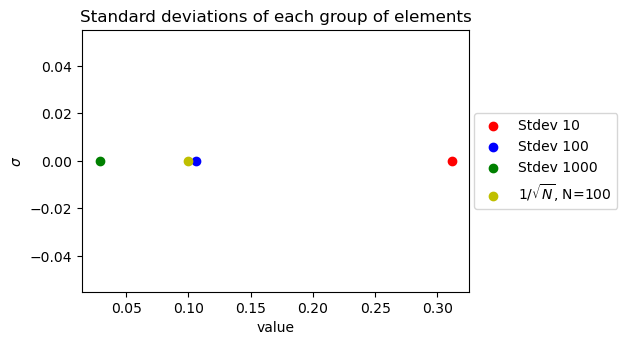

In [54]:
#Ploting the 3 std. dev. and the expected value as points (just x coordinate is needed)

import matplotlib.pyplot as plt

plt.scatter(std_dev10,0,color='r',label=r'Stdev 10')
plt.scatter(std_dev100,0,color='b',label=r'Stdev 100')
plt.scatter(std_dev1000,0,color='g',label=r'Stdev 1000')
plt.scatter(1/10,0,color='y',label=r'$1/\sqrt{N}$, N=100')


plt.title(r'Standard deviations of each group of elements')
plt.xlabel(r"value")
plt.ylabel(r"$\sigma$")
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

plt.show()

## 2. Exercise: Random trial following a given PDF

The goal of this exercise is to generate a random trial following a **Probabilty Distribution Function** (PDF) in the file: “PDF_double_gauss.txt”.

    1) Read the file “PDF_double_gauss_2021.txt” (think to take a look to the file before to know if you need to transpose or not when you use numpy.loadtxt). There 2 arrays : x_arr and pdf_arr. (ie. x and p(x))
    2) Determine the size of the element dx
    3) Check that the sum pdf_arr * dx is close to 1 (in this case, the pdf is realy a pdf) 
    4) Construct the cumulative distribution function (CDF) in an array cumul_arr
    5) plot the PDF and the CDF in two diferent plots
    6) Using uniform random trials and the CDF from 4), generate 20000 random trials you will store in an array myrand_arr
    7) Plot the normed (sum=1) histogram of your trials using numpy.hist, using 500 bins between. Overplot pdf_arr

In [5]:
#1 Reading the txt file
x_arr,p_arr = np.loadtxt('PDF_double_gauss_2021.txt', unpack = True)

x1 = x_arr[1:]
x2 = x_arr[:-1]

#2 calculating the width of the interval dx for each consecutive pair of values
dx = x1-x2

print('The width of the interval dx (in array shape) has size:')
dx

The width of the interval dx (in array shape) has size:


array([0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01])

In [6]:
#3 computing the sum p*dx and making sure it sums 1
dx = np.append(dx,[0.01])
p_times_dx = p_arr.dot(dx)

print('The sum (dot product of both arrays p & dx) is equal to',p_times_dx) # close to 1

The sum (dot product of both arrays p & dx) is equal to 0.9999963524247918


## Ex. 2, item 4) CDF(x)

In [7]:
#4 constructing the cumulative distribution funcition
cumul_arr = np.cumsum(p_arr)/100 #using directly the numpy function

cumul_arr

array([7.08271527e-11, 1.43006904e-10, 2.16564394e-10, ...,
       9.99996240e-01, 9.99996297e-01, 9.99996352e-01])

In [8]:
# just to make sure, one can also check the cumulative D.F.
#adding up second column of the PDF array, i.e., the probability
np.sum(p_arr)/100

0.9999963524247931

 ## Ex. 2, item 5) Plots of PDF(x) & CDF(x)

<function matplotlib.pyplot.show(close=None, block=None)>

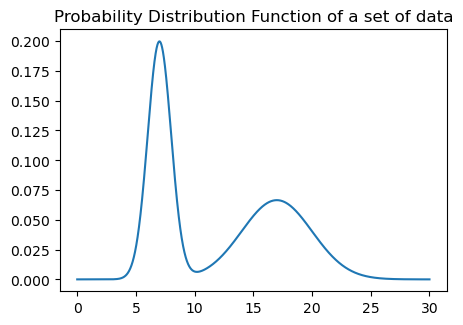

In [24]:
#5 Plotting the PDF and CDF of the data set
plt.plot(x_arr,p_arr)
plt.title(r'Probability Distribution Function of a set of data')
plt.rcParams["figure.figsize"] = (5,3.4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

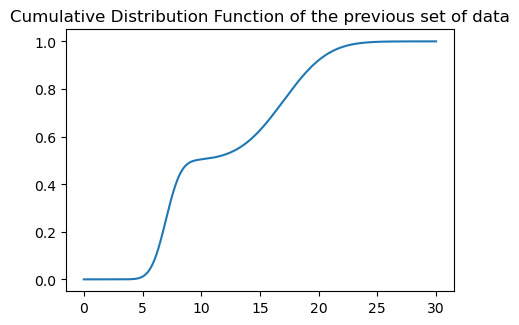

In [25]:
plt.plot(x_arr,cumul_arr)
plt.title(r'Cumulative Distribution Function of the previous set of data')
plt.show

## Ex. 2, item 6)

In [11]:
# corroborating that the min. and max values of the CDF array are (almost) 0 & 1
print(cumul_arr[0])
print(cumul_arr[-1])

7.082715270962327e-11
0.9999963524247923


In [27]:
#6. 20000 random trials from CDF all put togheter in an array,
   #such that  CDF(x)= random (between 0,1) (with CDF the derivative of PDF)

myrandom_arr = np.random.uniform(cumul_arr[0],cumul_arr[-1],size=(20000))
print(myrandom_arr)
myrandom_arr.shape

[0.50030889 0.69585132 0.20635556 ... 0.32390485 0.59124044 0.59196255]


(20000,)

In [31]:
# making a loop for every entrance of the random array

x_gen = [] # the x values that are solutions to the condition CDF(x)= random, i.e., generators
CDF_values = []

for i in range(myrandom_arr.shape[0]):
    w = myrandom_arr[i]
    p = np.absolute(cumul_arr - w)
    index = np.argmin(p)
#     min_p = np.amin(p)     # find the min. such that the value is equal to itself (w ~ p) 
#     index = np.where(np.isclose(p,min_p,atol=1e-10))
    x_gen.append(x_arr[index])
    
    CDF_eval = cumul_arr[index]
    CDF_values.append(CDF_eval)

In [16]:
# One way to ensure this works is to print (for example) the first 5 values of the CDF(x)
# and verify that, indeed, they approximate to the first 5 values of myrandom_arr

CDF_values[:5]

[0.2312699825896712,
 0.01389071064946256,
 0.8495244291520352,
 0.5891755589059564,
 0.2849943847535089]

In [17]:
print('Hence, the generators 20,000 x that satisfies CDF(x)=rand are shown in the array below')
x_gen

Hence, the generators 20,000 x that satisfies CDF(x)=rand are shown in the array below


[6.9,
 5.08,
 18.56,
 14.23,
 7.17,
 14.96,
 15.83,
 11.68,
 16.36,
 19.55,
 14.09,
 8.1,
 17.47,
 6.21,
 7.11,
 16.4,
 7.26,
 7.01,
 14.24,
 16.17,
 7.73,
 8.44,
 15.780000000000001,
 18.46,
 7.930000000000001,
 20.38,
 7.66,
 16.54,
 14.76,
 13.290000000000001,
 13.75,
 13.950000000000001,
 19.2,
 15.41,
 19.61,
 5.68,
 7.54,
 7.32,
 8.08,
 16.6,
 14.9,
 19.900000000000002,
 6.76,
 19.400000000000002,
 17.11,
 8.66,
 8.35,
 14.68,
 4.5600000000000005,
 20.0,
 7.0,
 22.080000000000002,
 12.44,
 17.44,
 7.19,
 11.26,
 16.79,
 17.26,
 5.8100000000000005,
 5.73,
 6.78,
 18.0,
 7.57,
 7.5200000000000005,
 5.23,
 14.31,
 18.35,
 16.91,
 15.5,
 9.58,
 8.33,
 16.88,
 16.29,
 16.79,
 8.36,
 18.41,
 18.400000000000002,
 6.69,
 18.11,
 4.55,
 6.88,
 10.48,
 6.58,
 16.75,
 7.37,
 7.48,
 7.54,
 16.91,
 15.55,
 12.19,
 20.12,
 17.64,
 7.54,
 18.59,
 7.12,
 9.17,
 16.28,
 18.53,
 6.87,
 14.790000000000001,
 6.21,
 7.49,
 16.23,
 12.040000000000001,
 6.69,
 6.24,
 8.13,
 16.73,
 15.63,
 14.4,
 6.600

## Ex. 2, item 7)

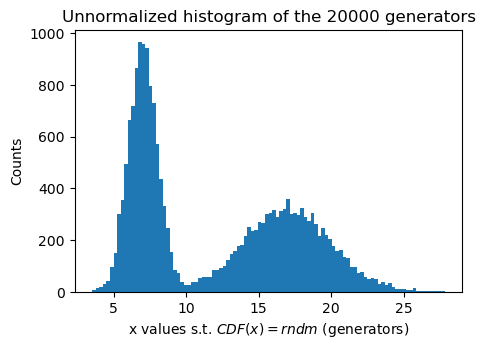

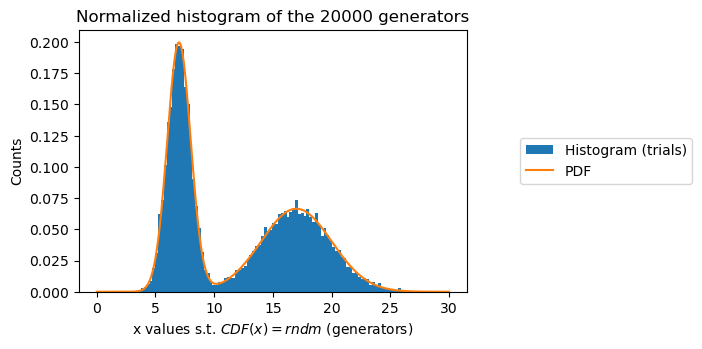

In [53]:
# 7) Plot the normed (sum=1) histogram of your trials using numpy.hist,
# using 100 bins between.

plt.hist(x_gen, bins=100)
plt.title('Unnormalized histogram of the 20000 generators')
plt.ylabel('Counts')
plt.xlabel('x values s.t. $CDF(x)= rndm$ (generators)')
plt.show()

######## Normalizing and overlapping the pdf curve ########

plt.hist(x_gen, bins=100, density=True, label=r'Histogram (trials)') #ploting histogram
plt.plot(x_arr,p_arr, label = r'PDF') # overplotting PDF
plt.title('Normalized histogram of the 20000 generators')
plt.ylabel('Counts')
plt.xlabel('x values s.t. $CDF(x)= rndm$ (generators)')
plt.legend(loc='right',bbox_to_anchor=(1.6, 0.5))
plt.show()

In [33]:
from numpy import linalg as la #using numpy normilizer function
norm = la.norm(myrandom_arr,ord=1)
print('the norm of the vector myrandom_arr is', norm)

myarr_norm = myrandom_arr/(norm) # represents the normed data (array)
myarr_norm

the norm of the vector myrandom_arr is 10002.131566951437


array([5.00202272e-05, 6.95703023e-05, 2.06311584e-05, ...,
       3.23835818e-05, 5.91114440e-05, 5.91836399e-05])

In [34]:
np.sum(myarr_norm) # this way one can prove is normalized (sum=1)

1.0